# Intro

## Standard modules

In [1]:
import os, sys
import pathlib
import requests

In [2]:
import numpy as np

In [3]:
from tqdm.auto import tqdm, trange

In [4]:
from sentence_transformers import util

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

In [140]:
from matplotlib.ticker import ScalarFormatter # per mettere i ticks in notazione scientifica

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [7]:
from sklearn.preprocessing import Normalizer
import umap

In [8]:
import seaborn

In [9]:
import pymannkendall as mk

In [10]:
from scipy.stats import spearmanr

## Personal modules

In [11]:
from toolbox.updater import time_is_now

## Folders

In [16]:
VECTOR_FOLDER='./NewProcessedData/vectors/'

In [17]:
BENCHMARK_FOLDER='./NewProcessedData/benchmarks/'

In [18]:
PCA_CENTR_VECTOR_FOLDER='./NewProcessedData/abtt5_vectors/'

In [19]:
ABTT1_VECTOR_FOLDER='./NewProcessedData/abtt1_vectors/'

In [20]:
WIKI_FOLDER='./NewProcessedData/wikipedia/vectors/'

In [21]:
TEXT_FOLDER='./NewProcessedData/texts/'

## Reports' vectors

In [22]:
vecfiles=os.listdir(VECTOR_FOLDER)

In [23]:
vecfiles.sort()

In [24]:
# files from 2024 are un reliable, 
# as they probably refer to a different accounting year,
# due to differences with other countries
len(vecfiles)

575

In [25]:
vecfiles=[vecfile for vecfile in vecfiles if not vecfile.startswith('2024')]

In [26]:
len(vecfiles)

573

## Reports' texts

In [149]:
textfiles=os.listdir(TEXT_FOLDER)

In [150]:
textfiles.sort()

In [151]:
# files from 2024 are un reliable, 
# as they probably refer to a different accounting year,
# due to differences with other countries
len(textfiles)

575

In [152]:
textfiles=[textfile for textfile in textfiles if not textfile.startswith('2024')]

In [153]:
len(textfiles)

573

## FDR

In [32]:
def fdr(pvals, alpha):
    l_pvals=len(pvals)
    s_pvals=np.sort(pvals)
    fdr_levels=(1+np.arange(l_pvals))/l_pvals*alpha
    fdr_mask=s_pvals<=fdr_levels
    if np.sum(fdr_mask)>0:
        return fdr_levels[fdr_mask][-1]
    else:
        return 0

## Sector helper

In [33]:
rtf_files=os.listdir('./rtf')
rtf_files.sort()

In [34]:
sec_helper={}
for file in rtf_files:
    splitted_name=file.split('_')
    if splitted_name[0].isnumeric():
        if splitted_name[0] not in sec_helper.keys():
            sec_helper[splitted_name[0].zfill(2)]=splitted_name[1]

In [35]:
sec_helper

{'10': 'Telecommunications',
 '11': 'Utilities',
 '01': 'Basic Materials',
 '02': 'Consumer Discretionary',
 '03': 'Consumer Staples',
 '04': 'Energy',
 '05': 'Financials',
 '06': 'Health Care',
 '07': 'Industrials',
 '08': 'Real Estate',
 '09': 'Technology'}

In [36]:
secs=list(sec_helper.keys())

In [37]:
secs=sorted(secs)

In [38]:
 sec_helper=dict(sorted(sec_helper.items()))

In [39]:
sec_helper

{'01': 'Basic Materials',
 '02': 'Consumer Discretionary',
 '03': 'Consumer Staples',
 '04': 'Energy',
 '05': 'Financials',
 '06': 'Health Care',
 '07': 'Industrials',
 '08': 'Real Estate',
 '09': 'Technology',
 '10': 'Telecommunications',
 '11': 'Utilities'}

### Aggregated sectors

In [40]:
agg_secs={'A': {'name':'Consumer Goods', 'sectors':{'02', '03'}}, 
 'B':{'name':'Essential Infrastructure & Services', 'sectors':{'08', '10', '11'}}, 
 'C':{'name':'Production Sectors','sectors':{'01', '04', '07'}},
 'D':{'name':'Specialized Services','sectors':{'05', '06', '09'}}}

In [41]:
sec2agg_d={'01':'C', '02':'A', '03':'A', '04':'C', '05':'D', '06':'D', '07':'C', '08':'B', '09':'D', '10':'B', '11':'B'}

## SDG helper

In [42]:
sdg_helper={'01':'No Poverty', 
 '02': 'Zero hunger', 
 '03': 'Good health and well-being', 
 '04': 'Quality education',
 '05': 'Gender equality',
 '06': 'Clean water and sanitation',
 '07': 'Affordable and clean energy',
 '08': 'Decent work and economic growth',
 '09': 'Industry, Innovation, Technology and Infrastructure',
 '10': 'Reduced inequality',
 '11': 'Sustainable cities and communities',
 '12': 'Responsible consumption and production',
 '13': 'Climate action',
 '14': 'Life below water',
 '15': 'Life on land',
 '16': 'Peace, justice and strong institutions',
 '17': 'Partnerships for the goals'
}

## Plot standards for sectors

### Disaggregated sectors

In [43]:
_colors=['navy', 'cyan', 'darkturquoise', 'orange', 'magenta', 'darkorchid', 'darkred', 'tomato', 'crimson', 'cadetblue', 'slateblue']

In [44]:
_lss=['-', '--', ':', '-.']

In [45]:
_markers=['^', 's', 'p', 'H', '8', 'X', 'D', '*', 'o']

In [46]:
sec_plots_feat={sec: {'color':_colors[i_s], 'ls':_lss[i_s % len(_lss)], 'marker':_markers[i_s %len(_markers)]} for i_s, sec in enumerate(secs)}

In [47]:
sec_plots_feat

{'01': {'color': 'navy', 'ls': '-', 'marker': '^'},
 '02': {'color': 'cyan', 'ls': '--', 'marker': 's'},
 '03': {'color': 'darkturquoise', 'ls': ':', 'marker': 'p'},
 '04': {'color': 'orange', 'ls': '-.', 'marker': 'H'},
 '05': {'color': 'magenta', 'ls': '-', 'marker': '8'},
 '06': {'color': 'darkorchid', 'ls': '--', 'marker': 'X'},
 '07': {'color': 'darkred', 'ls': ':', 'marker': 'D'},
 '08': {'color': 'tomato', 'ls': '-.', 'marker': '*'},
 '09': {'color': 'crimson', 'ls': '-', 'marker': 'o'},
 '10': {'color': 'cadetblue', 'ls': '--', 'marker': '^'},
 '11': {'color': 'slateblue', 'ls': ':', 'marker': 's'}}

### Aggregated sectors

In [145]:
agg_sec_plots={'A': {'color':'navy', 'marker':'o', 'ls':'-'}, 
               'B': {'color':'darkcyan', 'marker':'*', 'ls':'--'},
               'C': {'color':'magenta', 'marker':'D', 'ls':'-.'},
               'D': {'color':'orange', 'marker':'s', 'ls':':'}}

# Number of documents

## Global

In [49]:
years=[]
n_docs=[]
for i_vf, vecfile in enumerate(vecfiles):
    year=vecfile[:4]
    if year not in years:
        years.append(year)
        n_docs.append(0)
    n_docs[-1]+=1

In [50]:
np.vstack((years, n_docs)).T

array([['2015', '40'],
       ['2016', '44'],
       ['2017', '51'],
       ['2018', '56'],
       ['2019', '67'],
       ['2020', '69'],
       ['2021', '76'],
       ['2022', '80'],
       ['2023', '90']], dtype='<U21')

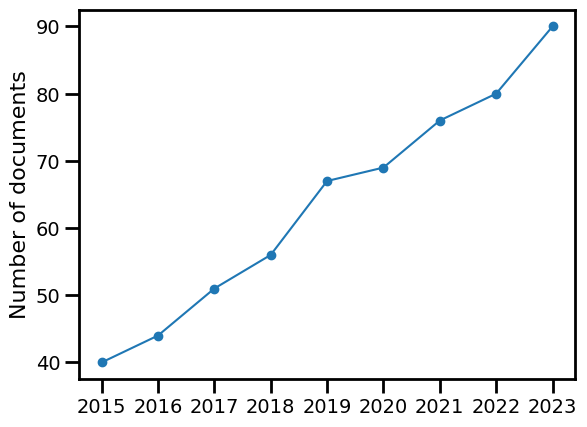

In [51]:
plt.plot(years, n_docs, marker='o')
plt.ylabel('Number of documents', fontsize=16)
plt.show()

In [52]:
mk.original_test(n_docs)

Mann_Kendall_Test(trend='increasing', h=True, p=0.00026326080270355767, z=3.6490022459988087, Tau=1.0, s=36.0, var_s=92.0, slope=6.125, intercept=42.5)

## Per sector

In [53]:
n_docs_per_sec=np.zeros((11, len(years)), dtype=int)
for i_y, year in enumerate(years):
    year_docs=[textfile for textfile in textfiles if textfile.startswith(year)]
    for yd in year_docs:
        sec=yd[5:7]
        index=int(sec)-1
        n_docs_per_sec[index, i_y]+=1

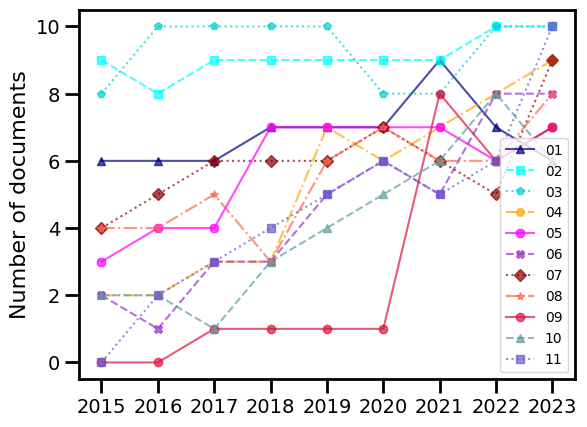

In [68]:
for i in range(len(n_docs_per_sec)):
    _sec=str(i+1).zfill(2)
    _sec_info=sec_plots_feat[_sec]
    plt.plot(years, n_docs_per_sec[i], label=_sec, alpha=0.7, **_sec_info)
plt.legend()
plt.ylabel('Number of documents', fontsize=16)
plt.show()

### Different trends

#### Correlating trends

In [55]:
alpha=0.05

In [56]:
corrs=np.zeros(len(n_docs_per_sec))
pvals=np.zeros(len(n_docs_per_sec))
for i in range(len(n_docs_per_sec)):
    cacca=spearmanr(n_docs_per_sec[i], n_docs)
    pvals[i]=cacca.pvalue
    corrs[i]=cacca.statistic

In [57]:
fdr_th=fdr(pvals, alpha=alpha)

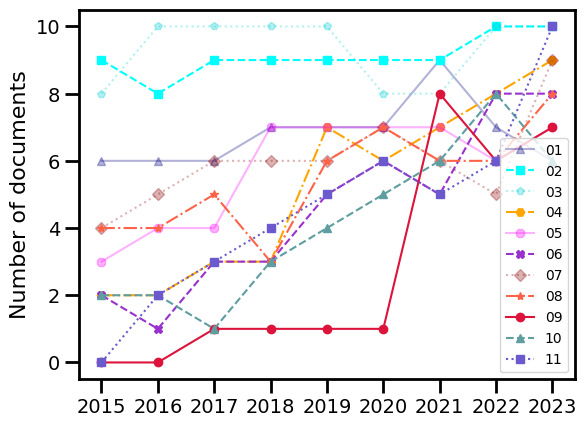

In [69]:
for i in range(len(n_docs_per_sec)):
    _sec=str(i+1).zfill(2)
    _sec_info=sec_plots_feat[_sec]
    
    if pvals[i]<fdr_th:
        plt.plot(years, n_docs_per_sec[i], label=_sec, **_sec_info)
    else:
        plt.plot(years, n_docs_per_sec[i], label=_sec, alpha=0.3, **_sec_info)
plt.legend()
plt.ylabel('Number of documents', fontsize=16)
plt.show()

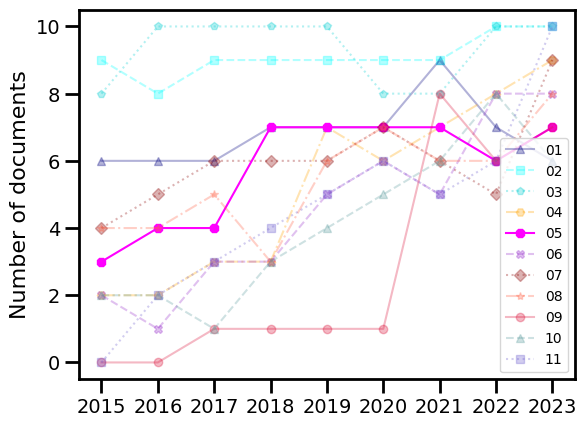

In [70]:
for i in range(len(n_docs_per_sec)):
    _sec=str(i+1).zfill(2)
    _sec_info=sec_plots_feat[_sec]
    
    if pvals[i]>=fdr_th and pvals[i]<alpha:
        plt.plot(years, n_docs_per_sec[i], label=_sec, **_sec_info)
    else:
        plt.plot(years, n_docs_per_sec[i], label=_sec, alpha=0.3, **_sec_info)
plt.legend()
plt.ylabel('Number of documents', fontsize=16)
plt.show()

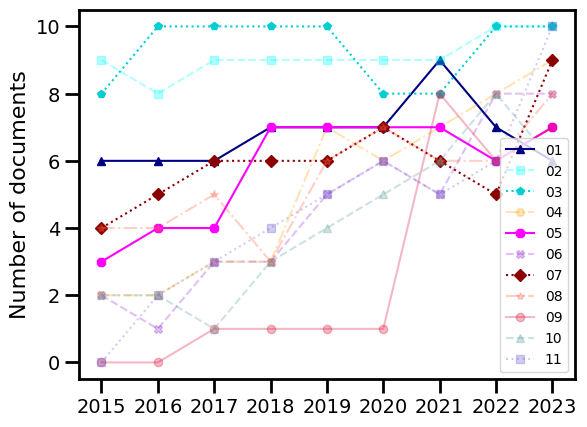

In [71]:
for i in range(len(n_docs_per_sec)):
    _sec=str(i+1).zfill(2)
    _sec_info=sec_plots_feat[_sec]
    
    if pvals[i]>=fdr_th:
        plt.plot(years, n_docs_per_sec[i], label=_sec, **_sec_info)
    else:
        plt.plot(years, n_docs_per_sec[i], label=_sec, alpha=0.3, **_sec_info)
plt.legend()
plt.ylabel('Number of documents', fontsize=16)
plt.show()

#### Increasing trends

In [77]:
alpha=0.05

In [78]:
mk_pvals=np.zeros(len(n_docs_per_sec))
for i in range(len(n_docs_per_sec)):
    cacca=mk.original_test(n_docs_per_sec[i])
    mk_pvals[i]=cacca.p

In [79]:
fdr_th_mk=fdr(mk_pvals, alpha=alpha)

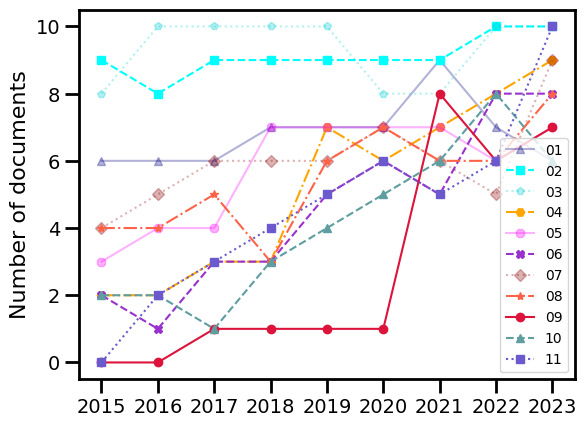

In [81]:
for i in range(len(n_docs_per_sec)):
    _sec=str(i+1).zfill(2)
    _sec_info=sec_plots_feat[_sec]
    
    if mk_pvals[i]<fdr_th_mk:
        plt.plot(years, n_docs_per_sec[i], label=_sec, **_sec_info)
    else:
        plt.plot(years, n_docs_per_sec[i], label=_sec, alpha=0.3, **_sec_info)
plt.legend()
plt.ylabel('Number of documents', fontsize=16)
plt.show()

## Per aggregated sector

In [82]:
n_docs_per_agg_sec=np.zeros((4, len(years)), dtype=int)
for i_y, year in enumerate(years):
    year_docs=[textfile for textfile in textfiles if textfile.startswith(year)]
    for yd in year_docs:
        sec=yd[5:7]
        agg=sec2agg_d[sec]
        
        index=ord(agg)-ord('A')
        n_docs_per_agg_sec[index, i_y]+=1

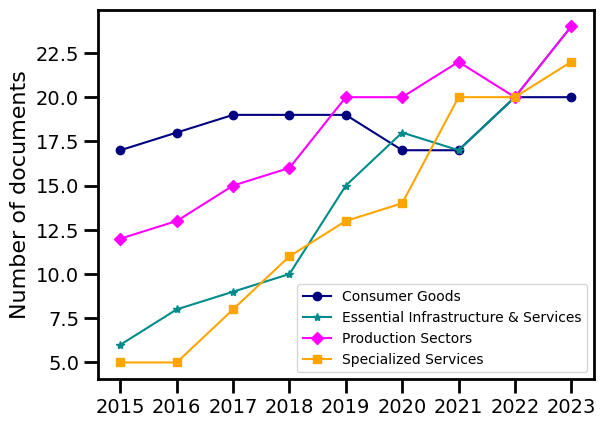

In [83]:
for i in range(len(n_docs_per_agg_sec)):
    _agg=chr(i+ord('A'))
    agg_sec_info=agg_sec_plots[_agg]
    
    plt.plot(years, n_docs_per_agg_sec[i], label=agg_secs[_agg]['name'], **agg_sec_info)
plt.legend()
plt.ylabel('Number of documents', fontsize=16)
plt.show()

In [158]:
for i in range(len(n_docs_per_agg_sec)):
    _agg=chr(i+ord('A'))
    cacca=mk.original_test(n_docs_per_agg_sec[i])
    print(agg_secs[_agg]['name'], cacca.trend, cacca.p)

Consumer Goods no trend 0.1895495140666308
Essential Infrastructure & Services increasing 0.0005806665459491267
Production Sectors increasing 0.0014130549000419546
Specialized Services increasing 0.0005042182294490161


In [159]:
0.05/4

0.0125

## Final plot

In [127]:
years

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

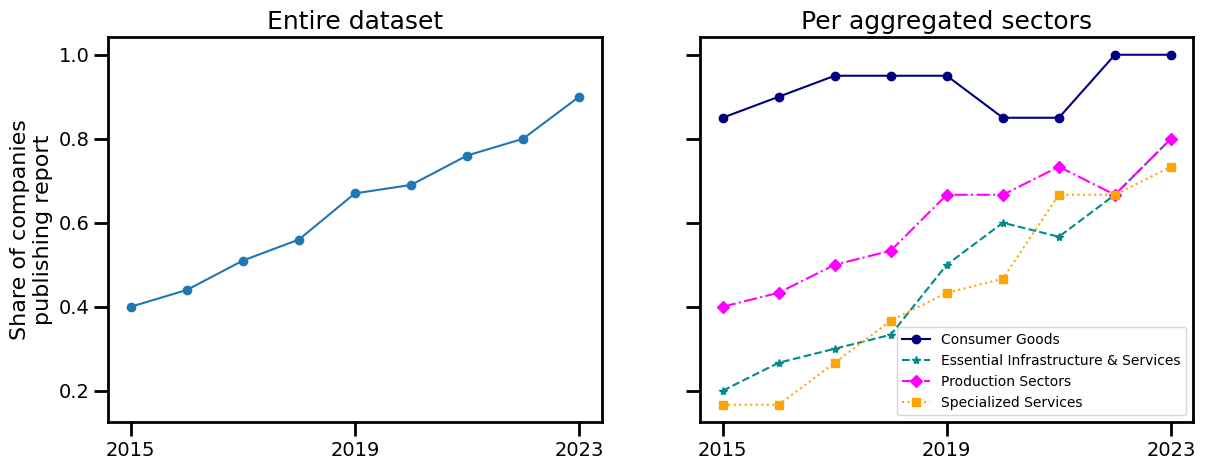

In [173]:
fig, axs=plt.subplots(1,2, sharex=True, figsize=(14, 5), sharey=True)

axs[0].plot(years, [n/100 for n in n_docs], marker='o')
axs[0].set_ylabel(f'Share of companies\npublishing report', fontsize=16)
xticks=['2015', '2019', '2023']
axs[0].set_xticks(xticks)
axs[0].set_title('Entire dataset', fontsize=18)


for i in range(len(n_docs_per_agg_sec)):
    _agg=chr(i+ord('A'))
    agg_sec_info=agg_sec_plots[_agg]
    if i==0:
        max_i=20
    else:
        max_i=30
    axs[1].plot(years, n_docs_per_agg_sec[i]/max_i, label=agg_secs[_agg]['name'], **agg_sec_info)
axs[1].legend()
#axs[1].set_ylabel('Number of documents', fontsize=16)
axs[1].set_xticks(xticks)
#yticks=[5, 10, 15, 20, 25]
#axs[1].set_yticks(yticks)
axs[1].set_title('Per aggregated sectors', fontsize=18)
#plt.subplots_adjust(wspace=0.3)
plt.savefig('./NewPlots/n_of_reports.png', dpi=300)
plt.show()

# Length of document

## Global

In [84]:
av_l_docs=np.zeros(len(years), dtype=int)
for i_y, year in enumerate(years):
    year_docs=[textfile for textfile in textfiles if textfile.startswith(year)]
    y_l_docs=np.zeros(len(year_docs), dtype=int)
    for i_yd, yd in enumerate(year_docs):
        with open(TEXT_FOLDER+yd, 'r') as f:
            _text=f.read()
        y_l_docs[i_yd]=len(_text)
    av_l_docs[i_y]=np.mean(y_l_docs)

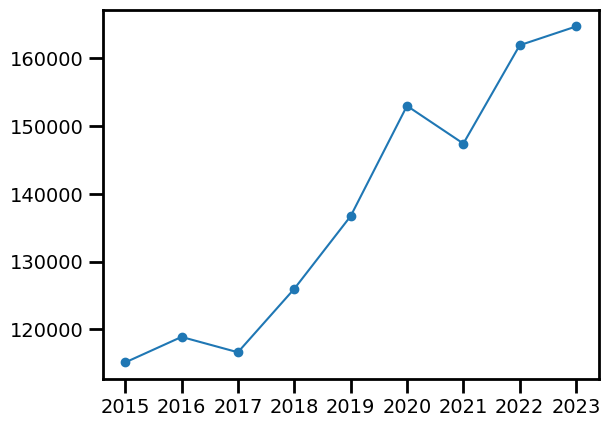

In [85]:
plt.plot(years, av_l_docs, marker='o')
plt.show()

In [86]:
mk.original_test(av_l_docs)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0012293849189448647, z=3.2319734178846593, Tau=0.8888888888888888, s=32.0, var_s=92.0, slope=7072.0, intercept=108400.0)

## Per sector

In [94]:
av_l_docs_per_sec=np.zeros((11, len(years)))
for i_y, year in enumerate(years):
    for sec in secs:
        index=int(sec)-1
        year_sec_docs=[textfile for textfile in textfiles if textfile.startswith(year) and textfile[5:7]==sec]
        if len(year_sec_docs)>0:
            y_l_docs=np.zeros(len(year_sec_docs), dtype=int)
            for i_yd, yd in enumerate(year_sec_docs):
            

                with open(TEXT_FOLDER+yd, 'r') as f:
                    _text=f.read()
                y_l_docs[i_yd]=len(_text)
        
            av_l_docs_per_sec[index, i_y]=np.mean(y_l_docs)

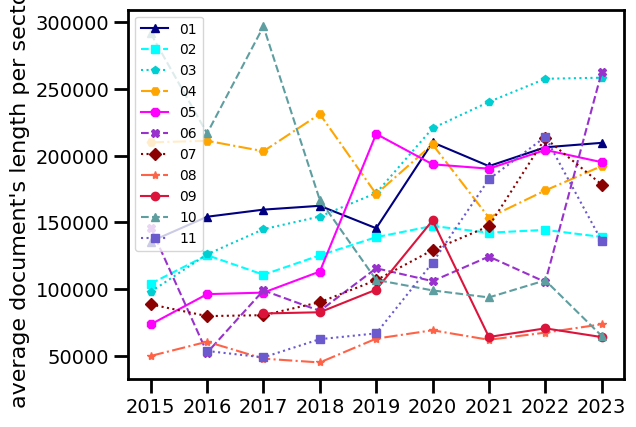

In [99]:
for i in range(len(av_l_docs_per_sec)):
    _sec=secs[i]
    _sec_info=sec_plots_feat[_sec]
    year_mask=av_l_docs_per_sec[i]>0
    plt.plot(np.array(years)[year_mask], av_l_docs_per_sec[i][year_mask],label=_sec, **_sec_info)
plt.legend()
plt.ylabel("average document's length per sector", fontsize=16)
plt.show()

### Different trends

#### Correlating trends

In [100]:
alpha=0.05

In [101]:
corrs=np.zeros(len(av_l_docs_per_sec))
pvals=np.zeros(len(av_l_docs_per_sec))
for i in range(len(av_l_docs_per_sec)):
    cacca=spearmanr(av_l_docs_per_sec[i], av_l_docs)
    pvals[i]=cacca.pvalue
    corrs[i]=cacca.statistic

In [102]:
fdr_th=fdr(pvals, alpha=alpha)

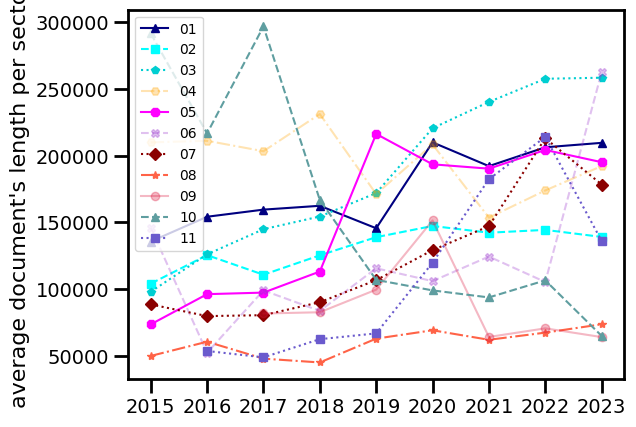

In [108]:
for i in range(len(av_l_docs_per_sec)):
    
    _sec=secs[i]
    _sec_info=sec_plots_feat[_sec]
    year_mask=av_l_docs_per_sec[i]>0
    
    if pvals[i]<=fdr_th:
        plt.plot(np.array(years)[year_mask], av_l_docs_per_sec[i][year_mask],label=_sec, **_sec_info)
    else:
        plt.plot(np.array(years)[year_mask], av_l_docs_per_sec[i][year_mask],label=_sec, **_sec_info, alpha=0.3)
plt.legend()
plt.ylabel("average document's length per sector", fontsize=16)
plt.show()

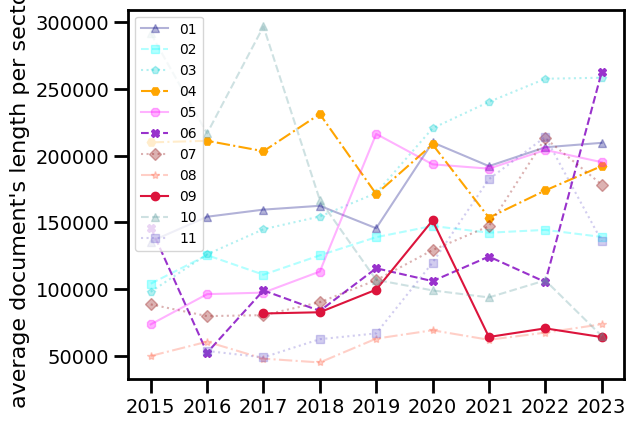

In [109]:
for i in range(len(av_l_docs_per_sec)):
    
    _sec=secs[i]
    _sec_info=sec_plots_feat[_sec]
    year_mask=av_l_docs_per_sec[i]>0
    
    if pvals[i]>fdr_th:
        plt.plot(np.array(years)[year_mask], av_l_docs_per_sec[i][year_mask],label=_sec, **_sec_info)
    else:
        plt.plot(np.array(years)[year_mask], av_l_docs_per_sec[i][year_mask],label=_sec, **_sec_info, alpha=0.3)
plt.legend()
plt.ylabel("average document's length per sector", fontsize=16)
plt.show()

#### Increasing trends

In [110]:
alpha=0.05

In [111]:
mk_pvals=np.zeros(len(av_l_docs_per_sec))
for i in range(len(av_l_docs_per_sec)):
    cacca=mk.original_test(av_l_docs_per_sec[i])
    mk_pvals[i]=cacca.p

In [112]:
fdr_th_mk=fdr(mk_pvals, alpha=alpha)

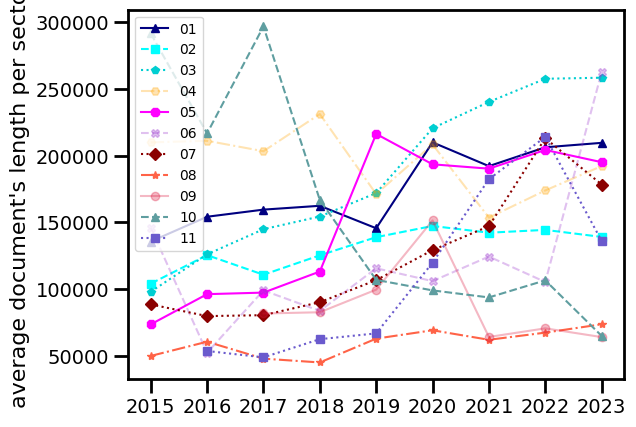

In [113]:
for i in range(len(av_l_docs_per_sec)):
    
    _sec=secs[i]
    _sec_info=sec_plots_feat[_sec]
    year_mask=av_l_docs_per_sec[i]>0
    
    if pvals[i]<=fdr_th_mk:
        plt.plot(np.array(years)[year_mask], av_l_docs_per_sec[i][year_mask],label=_sec, **_sec_info)
    else:
        plt.plot(np.array(years)[year_mask], av_l_docs_per_sec[i][year_mask],label=_sec, **_sec_info, alpha=0.3)
plt.legend()
plt.ylabel("average document's length per sector", fontsize=16)
plt.show()

## Per aggregated sector

In [114]:
av_l_docs_per_agg_sec=np.zeros((len(agg_secs.keys()), len(years)))
for i_y, year in enumerate(years):
    for agg_sec_key in agg_secs.keys():
        index=ord(agg_sec_key)-ord('A')
        mysecs=agg_secs[agg_sec_key]['sectors']
        
        year_aggsec_docs=[textfile for textfile in textfiles if textfile.startswith(year) and textfile[5:7] in mysecs]
    
        y_l_docs=np.zeros(len(year_aggsec_docs), dtype=int)
        for i_yd, yd in enumerate(year_aggsec_docs):
            

            with open(TEXT_FOLDER+yd, 'r') as f:
                _text=f.read()
            y_l_docs[i_yd]=len(_text)
        
        av_l_docs_per_agg_sec[index, i_y]=np.mean(y_l_docs)

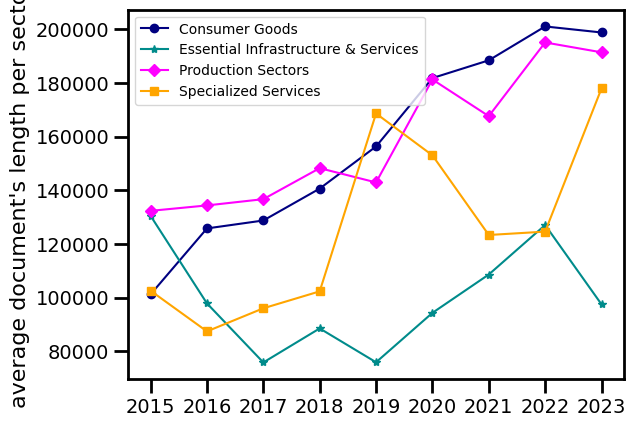

In [115]:
for i in range(len(av_l_docs_per_agg_sec)):
    _agg=chr(i+ord('A'))
    agg_sec_info=agg_sec_plots[_agg]
    
    plt.plot(years, av_l_docs_per_agg_sec[i], label=agg_secs[_agg]['name'], **agg_sec_info)
plt.legend()
plt.ylabel("average document's length per sector", fontsize=16)
plt.show()

In [160]:
for i in range(len(av_l_docs_per_agg_sec)):
    _agg=chr(i+ord('A'))
    cacca=mk.original_test(av_l_docs_per_agg_sec[i])
    print(agg_secs[_agg]['name'], cacca.trend, cacca.p)

Consumer Goods increasing 0.0005806665459491267
Essential Infrastructure & Services no trend 0.7544541774940892
Production Sectors increasing 0.0024990288576112185
Specialized Services increasing 0.04760395472787149


In [162]:
(1+np.arange(4))/4*alpha

array([0.0125, 0.025 , 0.0375, 0.05  ])

## Final plot

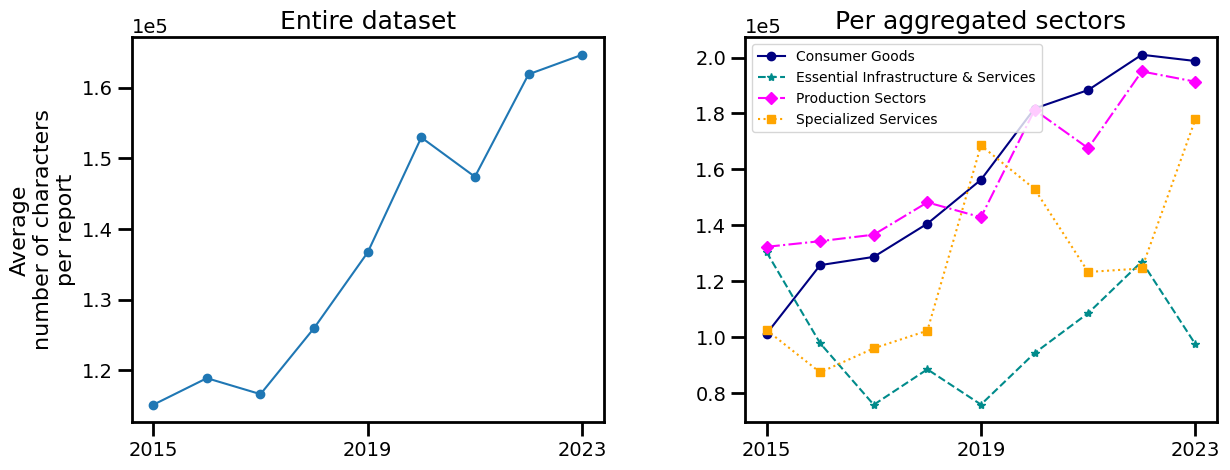

In [174]:
fig, axs=plt.subplots(1,2, sharex=True, figsize=(14, 5))

axs[0].plot(years, av_l_docs, marker='o')
axs[0].set_ylabel('Average\nnumber of characters\nper report', fontsize=16)
xticks=['2015', '2019', '2023']
axs[0].set_xticks(xticks)
axs[0].set_title('Entire dataset', fontsize=18)


for i in range(len(n_docs_per_agg_sec)):
    _agg=chr(i+ord('A'))
    agg_sec_info=agg_sec_plots[_agg]
    
    axs[1].plot(years, av_l_docs_per_agg_sec[i], label=agg_secs[_agg]['name'], **agg_sec_info)
axs[1].legend()
#axs[1].set_ylabel('Number of documents', fontsize=16)
axs[1].set_xticks(xticks)
#yticks=[5, 10, 15, 20, 25]
#axs[1].set_yticks(yticks)
axs[1].set_title('Per aggregated sectors', fontsize=18)
plt.subplots_adjust(wspace=0.3)

for ax in axs:
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.savefig('./NewPlots/l_reports.png', dpi=300)
plt.show()